<a href="https://colab.research.google.com/github/shwetakul2005/Mental-Health-Analysis-in-Work-Place/blob/main/MentalHealth_2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Title and Objective**

### **Problem:**
### 1) Can we predict whether an employee is likely to seek mental health treatment based on their demographics and workplace factors?

### 2)  Which workplace factors (benefits, anonymity, leave policy, remote work) most influence whether employees seek treatment?

## **Data Loading & Cleaning**

In [39]:
import pandas as pd
df = pd.read_csv("survey.csv")

In [40]:
df = df[(df['Age'] >= 18) & (df['Age'] <= 80)].copy()

In [41]:
print(df['Age'])

0       37
1       44
2       32
3       31
4       31
        ..
1254    26
1255    32
1256    34
1257    46
1258    25
Name: Age, Length: 1251, dtype: int64


In [42]:
df['Gender'] = df['Gender'].str.strip().str.lower()
df['Gender'] = df['Gender'].apply(lambda x: 'M' if x.startswith('m')
                                  else ('F' if x.startswith('f') else 'O'))

In [43]:
df.isnull().sum()

,0
Timestamp,0
Age,0
Gender,0
Country,0
state,513
self_employed,18
family_history,0
treatment,0
work_interfere,262
no_employees,0


In [44]:
df.fillna({'state': 'Unknown', 'work_interfere': 'Unknown'}, inplace=True)

In [45]:
df.isnull().sum()

,0
Timestamp,0
Age,0
Gender,0
Country,0
state,0
self_employed,18
family_history,0
treatment,0
work_interfere,0
no_employees,0


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1251 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1251 non-null   object
 1   Age                        1251 non-null   int64 
 2   Gender                     1251 non-null   object
 3   Country                    1251 non-null   object
 4   state                      1251 non-null   object
 5   self_employed              1233 non-null   object
 6   family_history             1251 non-null   object
 7   treatment                  1251 non-null   object
 8   work_interfere             1251 non-null   object
 9   no_employees               1251 non-null   object
 10  remote_work                1251 non-null   object
 11  tech_company               1251 non-null   object
 12  benefits                   1251 non-null   object
 13  care_options               1251 non-null   object
 14  wellness_prog

In [47]:
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,F,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,M,Canada,Unknown,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,M,United Kingdom,Unknown,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,M,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


## **EDA (Exploratory Data Analysis)**

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

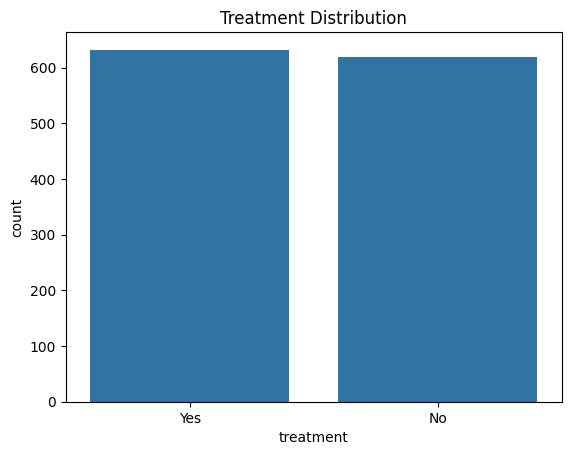

In [49]:
sns.countplot(data=df, x='treatment')
plt.title("Treatment Distribution")
plt.show()

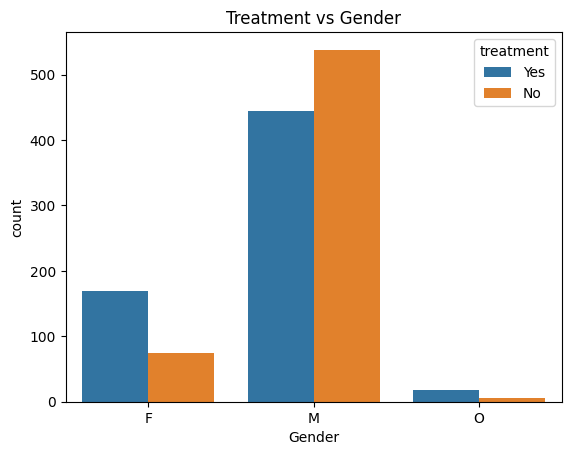

In [50]:
sns.countplot(data=df, x='Gender', hue='treatment')
plt.title("Treatment vs Gender")
plt.show()

#### F (Female)

Taller blue bar than orange → A larger proportion of females said “Yes” to treatment compared to “No”.

This suggests females are more likely to seek mental health treatment than not.

M (Male)

Orange bar (No) is taller than blue (Yes) → A larger proportion of males did NOT seek treatment.

Males seem less likely to seek treatment compared to females.

O (Other / Non-binary / Prefer not to say)

Very small group, but slightly more “Yes” responses than “No”.

Sample size is too small to draw strong conclusions, but it suggests a tendency to seek treatment.

Key Insight:

Gender appears to influence treatment-seeking behavior.

Females are more open to seeking mental health help than males.

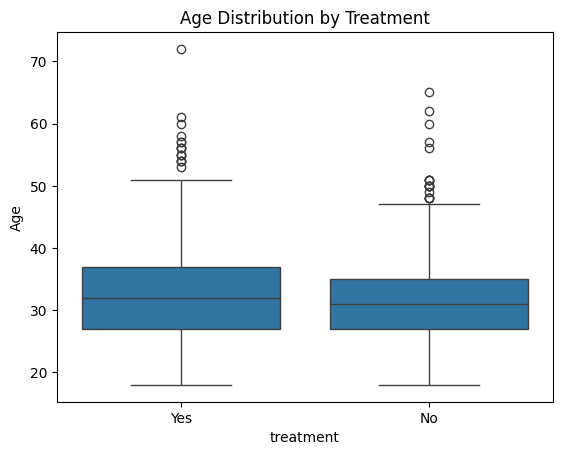

In [51]:
sns.boxplot(data=df, x='treatment', y='Age')
plt.title("Age Distribution by Treatment")
plt.show()

#### This is a boxplot comparing Age distribution for two groups — people who said Yes to treatment and those who said No.

Here’s what it tells us:

Median Age (middle line inside the box):
Both groups have almost the same median age (around early 30s).
→ There is no strong age difference between those seeking treatment and those who don’t.

IQR (Interquartile Range) (the box itself):
The central 50% of ages for both groups is between roughly 27–37 years.
→ Most respondents fall into the same age range regardless of treatment.

Whiskers (vertical lines):
They extend to the minimum and maximum values (excluding outliers).
Treatment group has a slightly higher upper whisker — meaning slightly more older people seek treatment, but not a huge difference.

Outliers (small circles):
There are a few older respondents (50–70+) in both groups.
→ These are rare cases but show that older people are still present in the dataset.

Key Insight:
Age does not seem to be a very strong predictor for treatment — both distributions look very similar.

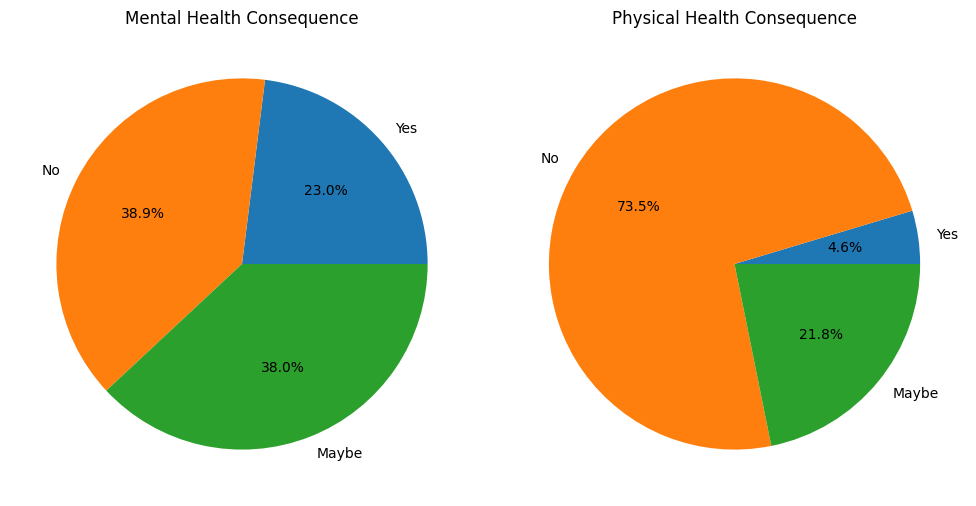

In [52]:
labels = ['Yes', 'No', 'Maybe']

# Get counts (reindex ensures all labels exist even if missing)
mental_counts = df.iloc[:, 18].value_counts().reindex(labels, fill_value=0)
physical_counts = df.iloc[:, 19].value_counts().reindex(labels, fill_value=0)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
# Mental Health Pie
axes[0].pie(mental_counts, labels=labels, autopct='%1.1f%%')
axes[0].set_title("Mental Health Consequence")

# Physical Health Pie
axes[1].pie(physical_counts, labels=labels, autopct='%1.1f%%')
axes[1].set_title("Physical Health Consequence")

plt.tight_layout()  # adjust spacing to avoid overlap
plt.show()

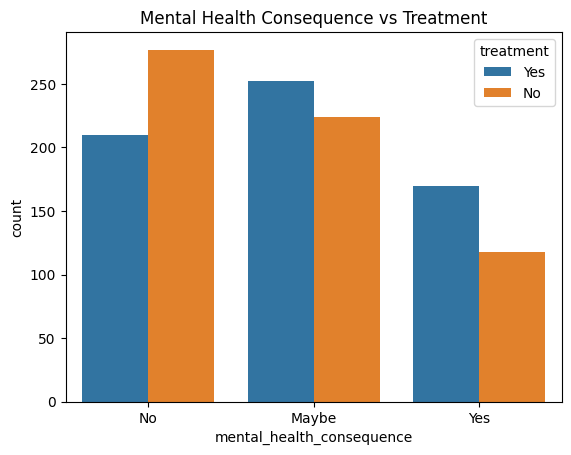

In [53]:
import seaborn as sns

sns.countplot(data=df, x='mental_health_consequence', hue='treatment')
plt.title("Mental Health Consequence vs Treatment")
plt.show()

## **Feature Engineering**

In [54]:
df['age_group'] = pd.cut(df['Age'], bins=[17,24,34,44,80],
                         labels=['18-24','25-34','35-44','45+'])

In [55]:
company_size_map = {
    "1-5": 3,
    "6-25": 15,
    "26-100": 63,
    "100-500": 300,
    "500-1000": 750,
    "1000-5000": 3000,
    "5000-10000": 7500,
    "More than 10000": 15000
}

# Apply mapping
df["no_employees"] = df["no_employees"].map(company_size_map)

In [56]:
df['support_score'] = (df['benefits'].eq('Yes').astype(int)
                      + df['wellness_program'].eq('Yes').astype(int)
                      + df['care_options'].eq('Yes').astype(int)
                      + df['seek_help'].eq('Yes').astype(int))

In [57]:
print(df['support_score'])

0       2
1       0
2       0
3       1
4       1
       ..
1254    0
1255    2
1256    2
1257    1
1258    2
Name: support_score, Length: 1251, dtype: int64


In [58]:
df=df.drop(columns=['Timestamp', 'comments', 'state'])

In [59]:
df.head()

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,age_group,support_score
0,37,F,United States,NaN,No,Yes,Often,15.0,No,Yes,...,No,No,Some of them,Yes,No,Maybe,Yes,No,35-44,2
1,44,M,United States,NaN,No,No,Rarely,NaN,No,No,...,Maybe,No,No,No,No,No,Don't know,No,35-44,0
2,32,M,Canada,NaN,No,No,Rarely,15.0,No,Yes,...,No,No,Yes,Yes,Yes,Yes,No,No,25-34,0
3,31,M,United Kingdom,NaN,Yes,Yes,Often,63.0,No,Yes,...,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,25-34,1
4,31,M,United States,NaN,No,No,Never,300.0,Yes,Yes,...,No,No,Some of them,Yes,Yes,Yes,Don't know,No,25-34,1


## **Modeling & Evaluation**

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression

X = df.drop(columns=['treatment'])
y = df['treatment'].map({'Yes':1, 'No':0})

numeric_cols = X.select_dtypes(include='number').columns
categorical_cols = X.select_dtypes(exclude='number').columns

num_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
cat_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ohe', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', num_pipe, numeric_cols),
    ('cat', cat_pipe, categorical_cols)
])

model = Pipeline([
    ('pre', preprocessor),
    ('clf', LogisticRegression(max_iter=1000, class_weight='balanced'))
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
model.fit(X_train, y_train)


Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Age', 'no_employees', 'support_score'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Gen...
       'work_interfere', 'remote_work', 'tech_company', 'benefits',
       'care_options', 'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'age_group'],
      dtype='object'))])),
                ('clf',
                 LogisticRegression(class_weight='balanced', max_iter=1000))])

              precision    recall  f1-score   support

           0       0.87      0.80      0.83       124
           1       0.82      0.88      0.85       127

    accuracy                           0.84       251
   macro avg       0.84      0.84      0.84       251
weighted avg       0.84      0.84      0.84       251

ROC-AUC: 0.9196088392176784


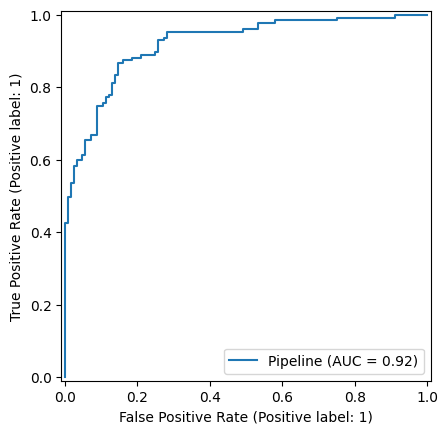

In [70]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))

RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.show()


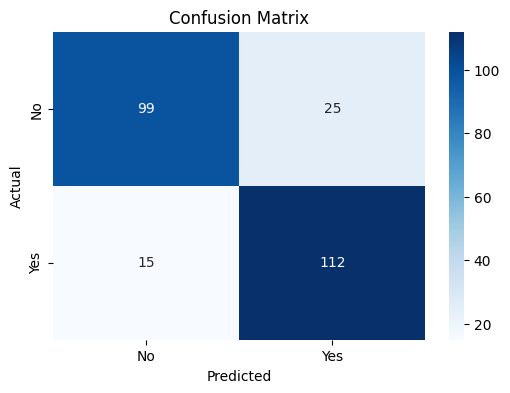

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Get predictions
y_pred = model.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [71]:
from xgboost import XGBClassifier

model_xgb = Pipeline([
    ('pre', preprocessor),
    ('clf', XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
])
model_xgb.fit(X_train, y_train)
print("XGB ROC-AUC:", roc_auc_score(y_test, model_xgb.predict_proba(X_test)[:,1]))


XGB ROC-AUC: 0.8813817627635255


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [14:38:08] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


## **Conclusion & Insights**

## **Future Work**